In [1]:
from neural_implementation import neural_classification as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
# UCITAVANJE PODATAKA I TESTIRANJE

df = pd.read_csv('../datasets/iris_extended.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [10]:
N = df.shape[0]
print(f'Ukupan broj podataka: {N}')

m = df.shape[1] - 1
print(f'Broj atributa svakog podatka: {m}')

attributes = list(df.drop('variety', axis=True).columns)
print(f'Atributi: {attributes}')

Ukupan broj podataka: 250
Broj atributa svakog podatka: 4
Atributi: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


In [11]:
attr1 = 'petal.length'
attr2 = 'petal.width'
attributes = [attr1, attr2]
m = len(attributes)

N = df.shape[0]
print(f'Velicina skupa podataka: {N}')

Velicina skupa podataka: 250


In [12]:
classes = df['variety'].unique()
n_classes = len(classes)

print(f'Klase: {classes}')
print(f'Broj klasa: {n_classes}\n')

name_to_class_dict = dict(zip(classes, range(n_classes)))
class_to_name_dict = dict(zip(range(n_classes), classes))

print(f'Mapiranje imena klasa u numericke vrednosti:')
for name, cls in name_to_class_dict.items():
    print(f'{name} -> {cls}')

print()
print(f'Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:')
for cls, name in class_to_name_dict.items():
    print(f'{cls} -> {name}')

Klase: ['Setosa' 'Versicolor' 'Virginica' 'Letosa' 'Helenica']
Broj klasa: 5

Mapiranje imena klasa u numericke vrednosti:
Setosa -> 0
Versicolor -> 1
Virginica -> 2
Letosa -> 3
Helenica -> 4

Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:
0 -> Setosa
1 -> Versicolor
2 -> Virginica
3 -> Letosa
4 -> Helenica


In [13]:
mapper_cls_to_vec = {}
for i in range(n_classes):
    vec = np.zeros((n_classes,))
    vec[i] = 1
    
    mapper_cls_to_vec[i] = vec
    
print('Mapiranje numericke vrednosti u odgovarajuci vektor:')
for cls, vec in mapper_cls_to_vec.items():
    print(f'{cls} -> {vec}')

Mapiranje numericke vrednosti u odgovarajuci vektor:
0 -> [1. 0. 0. 0. 0.]
1 -> [0. 1. 0. 0. 0.]
2 -> [0. 0. 1. 0. 0.]
3 -> [0. 0. 0. 1. 0.]
4 -> [0. 0. 0. 0. 1.]


In [14]:
y_tmp = df['variety']

y = np.zeros((N, n_classes))
for i in range(N):
    cls = name_to_class_dict[y_tmp[i]]
    y[i] = mapper_cls_to_vec[cls]

In [15]:
X = np.ones((N, 2*m + 1))
X[:, 1] = df[attr1]
X[:, 2] = df[attr2]
X[:, 3] = df[attr1]**2
X[:, 4] = df[attr2]**2

In [16]:
print(f'Podaci:')
print(X[:10])
print(' ...')

print(f'Ciljne promenljive:')
print(y[:10])
print(' ...')

Podaci:
[[1.   1.4  0.2  1.96 0.04]
 [1.   1.4  0.2  1.96 0.04]
 [1.   1.3  0.2  1.69 0.04]
 [1.   1.5  0.2  2.25 0.04]
 [1.   1.4  0.2  1.96 0.04]
 [1.   1.7  0.4  2.89 0.16]
 [1.   1.4  0.3  1.96 0.09]
 [1.   1.5  0.2  2.25 0.04]
 [1.   1.4  0.2  1.96 0.04]
 [1.   1.5  0.1  2.25 0.01]]
 ...
Ciljne promenljive:
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
 ...


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [18]:
print(f'X_train:')
print(X_train[:10])
print(' ...')
print()

print(f'y_train:')
print(y_train[:10])
print(' ...')
print()

print(f'X_test:')
print(X_test[:10])
print(' ...')
print()

print(f'y_test:')
print(y_test[:10])
print(' ...')

X_train:
[[1.000e+00 1.200e+00 2.000e-01 1.440e+00 4.000e-02]
 [1.000e+00 4.700e+00 1.100e+00 2.209e+01 1.210e+00]
 [1.000e+00 5.500e+00 1.000e+00 3.025e+01 1.000e+00]
 [1.000e+00 5.100e+00 1.900e+00 2.601e+01 3.610e+00]
 [1.000e+00 4.800e+00 1.800e+00 2.304e+01 3.240e+00]
 [1.000e+00 6.900e+00 2.300e+00 4.761e+01 5.290e+00]
 [1.000e+00 3.600e+00 1.300e+00 1.296e+01 1.690e+00]
 [1.000e+00 1.000e+00 2.000e-01 1.000e+00 4.000e-02]
 [1.000e+00 6.300e+00 1.200e+00 3.969e+01 1.440e+00]
 [1.000e+00 5.700e+00 2.500e+00 3.249e+01 6.250e+00]]
 ...

y_train:
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]
 ...

X_test:
[[ 1.    1.5   0.2   2.25  0.04]
 [ 1.    1.7   0.4   2.89  0.16]
 [ 1.    4.7   0.4  22.09  0.16]
 [ 1.    5.1   1.5  26.01  2.25]
 [ 1.    5.4   0.7  29.16  0.49]
 [ 1.    2.    1.4   4.    1.96]
 [ 1.    5.1   0.9  26.01  0.81]
 [ 1.    5.1   1.  

In [19]:
nn = nc.NeuralNetwork(2*m, [2*m, 2*m, 2*m], n_classes)

nn.print_network()
print()

nn.print_layer_mapper_sizes()
print()

nn.initialize_model()
print('Initial model:')
nn.print_model()

~ Neural network ~
Layer 1:
[1. 1. 1. 1. 1.]
Layer 2:
[1. 1. 1. 1. 1.]
Layer 3:
[1. 1. 1. 1. 1.]
Layer 4:
[1. 1. 1. 1. 1.]
Layer 5:
[1. 1. 1. 1. 1.]

Dimenzije matrica modela koji mapiraju slojeve:
0 -> 1: 4 x 5
1 -> 2: 4 x 5
2 -> 3: 4 x 5
3 -> 4: 5 x 5

Initial model:
Model:
W_0: 0 -> 1, shape: (4, 5)
[[ 0.06933405  0.0459977  -0.07138492  0.06987982 -0.04919246]
 [-0.06193439 -0.06150762  0.07904483 -0.01142944 -0.0795523 ]
 [ 0.06428001  0.09455656 -0.09040204  0.01583456  0.039449  ]
 [ 0.01927758 -0.00112048  0.03001348 -0.03797357 -0.04238289]]
W_1: 1 -> 2, shape: (4, 5)
[[-0.01139411  0.06853378 -0.07376624 -0.06618018 -0.05724444]
 [ 0.0688531   0.07195289  0.0928214   0.07586289 -0.07319454]
 [-0.04381779  0.07035311  0.0968289  -0.04536445 -0.05628469]
 [ 0.06656871 -0.00919584  0.09487571  0.03474209  0.07237338]]
W_2: 2 -> 3, shape: (4, 5)
[[-0.00875301 -0.07203547 -0.01330046  0.07129428  0.00676931]
 [ 0.04097565  0.07975802  0.03344775  0.0190385  -0.00447321]
 [ 0.02978

In [20]:
lambdas = [0] + [0.01 * (1.5**i) for i in range(8)]
print('lamda parameters:')
print(lambdas)

lamda parameters:
[0, 0.01, 0.015, 0.0225, 0.03375, 0.050625, 0.0759375, 0.11390625, 0.170859375]


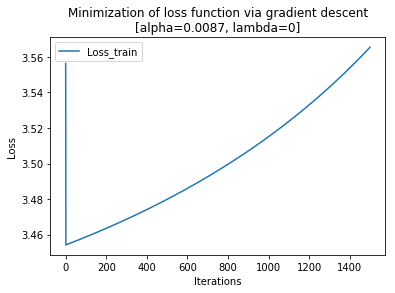

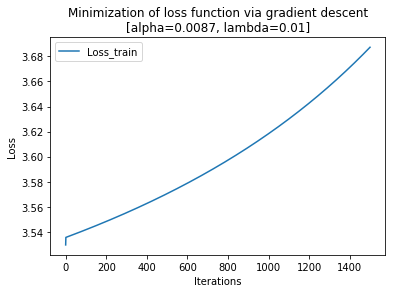

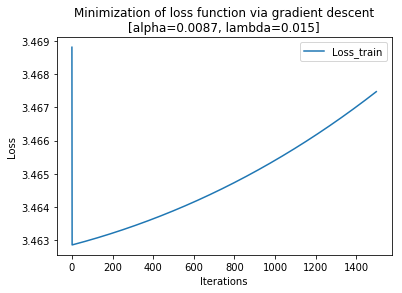

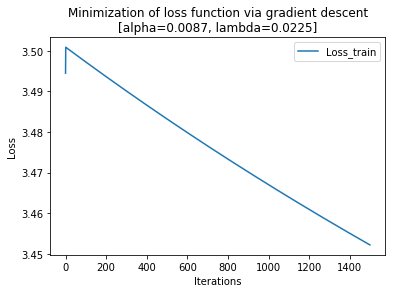

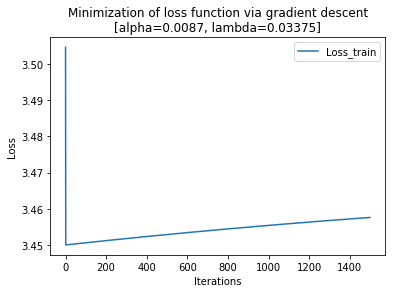

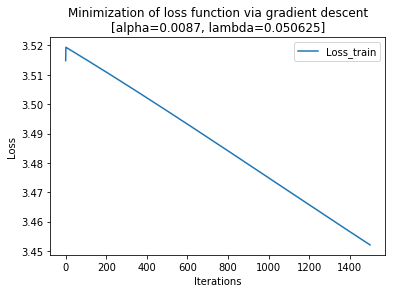

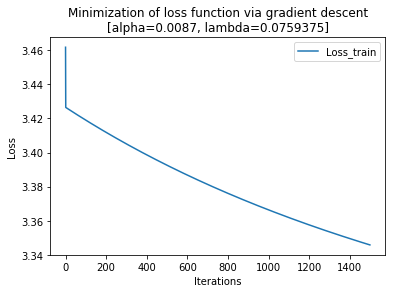

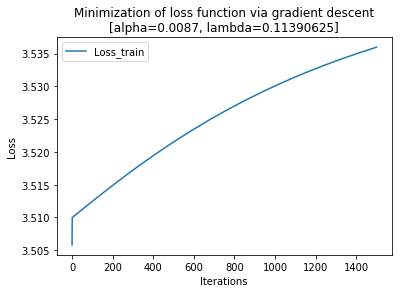

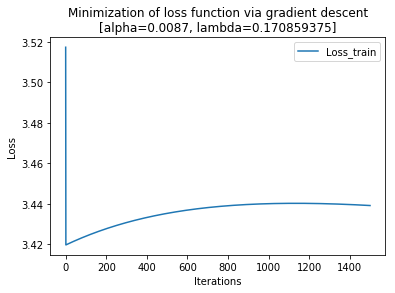

In [21]:
classifiers = [nn.fit(X_train, 
                      y_train, 
                      alpha=0.0087, 
                      lambda_param=lambda_param,
                      num_iter=1500,
                      plot=True,
                      gc_it=300,
                      gc_log_path='./gc_log.txt') 
               for lambda_param in lambdas]

In [22]:
losses_test = [clf.loss(X_test, y_test) for clf in classifiers]

print('Funkcije gubitka za svaki klasifikator posebno na test skupu:')
for i, loss in enumerate(losses_test):
    print(f'Klasifikator {i + 1}: Loss = {loss}')

Funkcije gubitka za svaki klasifikator posebno na test skupu:
Klasifikator 1: Loss = 3.564696271933464
Klasifikator 2: Loss = 3.68447148336732
Klasifikator 3: Loss = 3.4676623779146865
Klasifikator 4: Loss = 3.4523297129444397
Klasifikator 5: Loss = 3.4585084238383423
Klasifikator 6: Loss = 3.4535421825127224
Klasifikator 7: Loss = 3.3487198452064377
Klasifikator 8: Loss = 3.53588464058878
Klasifikator 9: Loss = 3.4372036208759638


In [23]:
min_loss = float('inf')
best_clf = None

for i, loss in enumerate(losses_test):
    if loss < min_loss:
        min_loss = loss
        best_clf = classifiers[i]
        
print(f'Najmanji gubitak (na test skupu) za svaki klasifikator: {min_loss}')
print(f'Regularizacioni parametar lambda za koji je naucen najbolji model: '
      f'{best_clf.lambda_learned}')      
print('Model najboljeg klasifikatora:')

best_clf.print_model()

Najmanji gubitak (na test skupu) za svaki klasifikator: 3.3487198452064377
Regularizacioni parametar lambda za koji je naucen najbolji model: 0.0759375
Model najboljeg klasifikatora:
Model:
W_0: 0 -> 1
[[-0.03050675 -0.00189187 -0.01614774 -0.02716517 -0.00660604]
 [ 0.02413565 -0.03271598  0.01875922 -0.01520321  0.00967683]
 [-0.03696157  0.02004831 -0.0307011   0.02764006  0.01000321]
 [-0.06155842 -0.01118768  0.03377234  0.03264198  0.03569555]]
W_1: 1 -> 2
[[-0.05666187 -0.00399904 -0.02728103  0.03477873 -0.00776259]
 [-0.01407282 -0.01553495  0.02843686 -0.01206103 -0.00671953]
 [-0.01227048 -0.0200299  -0.0065109   0.019979    0.03457765]
 [ 0.02557979 -0.01783109  0.01978605  0.0075582   0.00729925]]
W_2: 2 -> 3
[[-0.05666187 -0.00399904 -0.02728103  0.03477873 -0.00776259]
 [-0.01407282 -0.01553495  0.02843686 -0.01206103 -0.00671953]
 [-0.01227048 -0.0200299  -0.0065109   0.019979    0.03457765]
 [ 0.02557979 -0.01783109  0.01978605  0.0075582   0.00729925]]
W_3: 3 -> 4
[[-

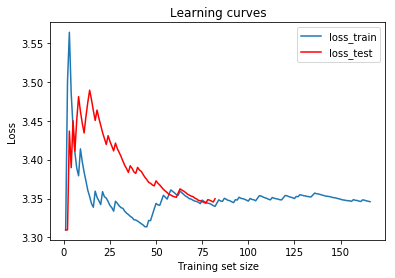

In [24]:
nc.plot_learning_curves(X_train, y_train, X_test, y_test, best_clf)

Ponovno iscrtavanje skupa podataka pred testiranje:


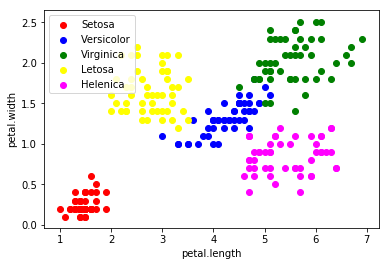

In [25]:
print('Ponovno iscrtavanje skupa podataka pred testiranje:')

colors = ['red', 'blue', 'green', 'yellow', 'magenta']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)

plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [26]:
x1 = np.array([1, 0.5, 0.4, 0.5**2, 0.4**2]) # Setosa
x2 = np.array([1, 4.2, 1.2, 4.2**2, 1.2**2]) # Versicolor
x3 = np.array([1, 5.5, 2, 5.5**2, 2**2]) # Virginca
x4 = np.array([1, 2.9, 1.9, 2.9**2, 1.9**2]) # Letosa
x5 = np.array([1, 5.2, 0.8, 5.2**2, 0.8**2]) # Helenica

In [27]:
y_predict1 = best_clf.predict(x1)
y_predict2 = best_clf.predict(x2)
y_predict3 = best_clf.predict(x3)
y_predict4 = best_clf.predict(x4)
y_predict5 = best_clf.predict(x5)

print('~ TESTIRANJE KLASIFIKATORA ~')

print('Test 1:')
nc.Classifier.prediction_info(y_predict1, class_to_name_dict)
print()

print('Test 2:')
nc.Classifier.prediction_info(y_predict2, class_to_name_dict)
print()

print('Test 3:')
nc.Classifier.prediction_info(y_predict3, class_to_name_dict)
print()

print('Test 4:')
nc.Classifier.prediction_info(y_predict4, class_to_name_dict)
print()

print('Test 5:')
nc.Classifier.prediction_info(y_predict5, class_to_name_dict)
print() 

~ TESTIRANJE KLASIFIKATORA ~
Test 1:
Prediction vector: [0.48533786 0.49575772 0.50059162 0.50855679 0.39181884]
Max prediction value: 0.508556791716381 (at position 3)
Class: Letosa

Test 2:
Prediction vector: [0.48533809 0.49575744 0.50059154 0.50855659 0.39181801]
Max prediction value: 0.5085565857282087 (at position 3)
Class: Letosa

Test 3:
Prediction vector: [0.48533825 0.49575725 0.50059151 0.50855646 0.39181736]
Max prediction value: 0.5085564592682735 (at position 3)
Class: Letosa

Test 4:
Prediction vector: [0.48533799 0.49575756 0.5005916  0.50855669 0.39181824]
Max prediction value: 0.5085566876879601 (at position 3)
Class: Letosa

Test 5:
Prediction vector: [0.48533819 0.49575731 0.5005915  0.50855649 0.39181769]
Max prediction value: 0.5085564889291405 (at position 3)
Class: Letosa

